In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


c:\Users\NITIN\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\NITIN\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('HR_comma_sep.csv')
df = pd.DataFrame(data)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [7]:
#Renaming 'sales' column to 'department'
print(df["sales"].unique())

df.rename(columns={"sales": "department"}, inplace=True)

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


In [8]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Explanatory Data Analysis

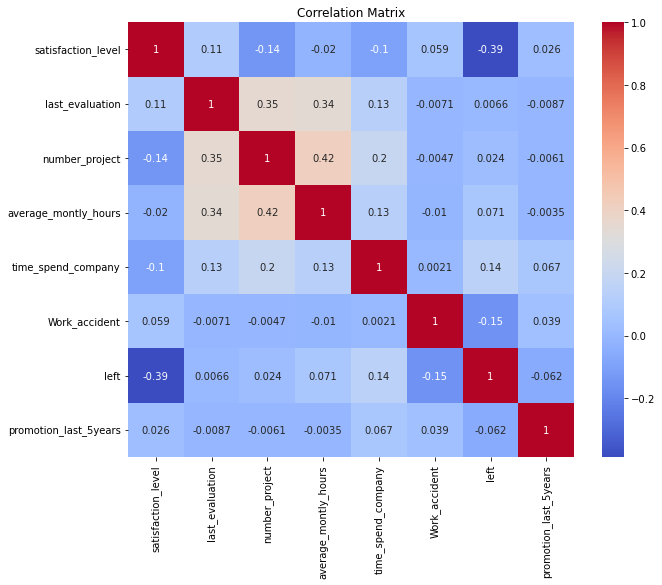

In [9]:
#Correlation Matrix
num_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10,8))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

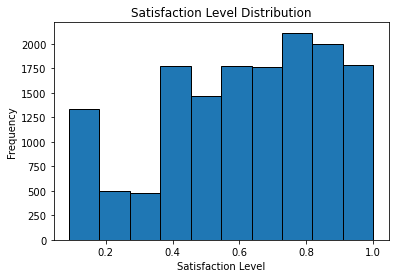

In [10]:
# Cell 6: distributions
plt.hist(df['satisfaction_level'], bins=10, edgecolor='black')
plt.title('Satisfaction Level Distribution')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()

- We can see that there are almost 2 peaks or modes in the above graph. That indicates there might be 2 groups of employees with different satisfaction patterns.

- One peak are the employees with lowest satisfaction level might be the ones who left the company.

- The other peak of employees are with high satisfaction level.


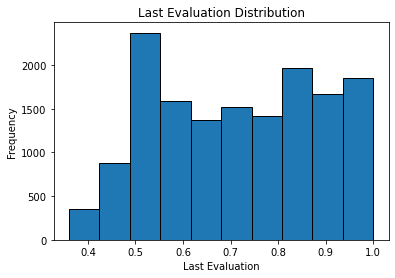

In [11]:
plt.hist(df['last_evaluation'], bins = 10, edgecolor='black')
plt.title('Last Evaluation Distribution')
plt.xlabel('Last Evaluation')
plt.ylabel('Frequency')
plt.show()

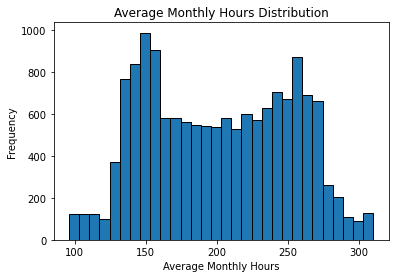

In [12]:
plt.hist(df['average_montly_hours'], bins=30, edgecolor='black')
plt.title('Average Monthly Hours Distribution')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')
plt.show()

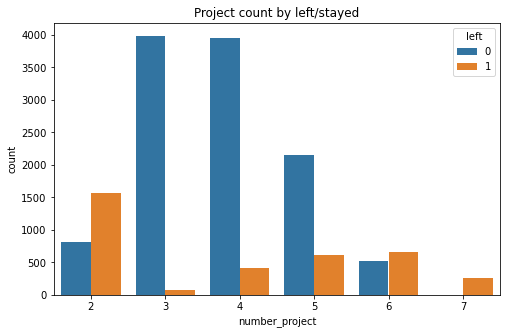

In [13]:
# Cell 7: projects vs left
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='number_project', hue='left')
plt.title('Project count by left/stayed')
plt.show()


### K-Means Clustering

In [14]:
# Filter data for employees who left
y_data = df[df['left'] == 1]

# Dataset with columns "satisfacation_level" and "last_evaluation" 
x_data = y_data[['satisfaction_level', 'last_evaluation']]

In [15]:
# Standardizing the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_data)

# Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_scaled)
y_kmeans = kmeans.predict(x_scaled)

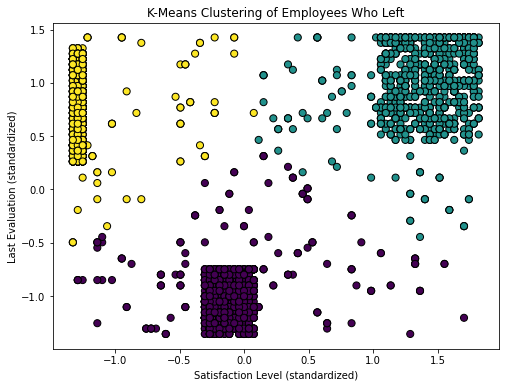

In [16]:
# Plotting the clusters
plt.figure(figsize=(8,6))
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('K-Means Clustering of Employees Who Left')
plt.xlabel('Satisfaction Level (standardized)')
plt.ylabel('Last Evaluation (standardized)')
plt.show()

Employees who had left the company has been clustered into three distinct groups and also can be seen that the clusters are well seperated. Let's interpret the clusters:

1. The cluster on **Top-right** shows that the employees are highly satisfied and also are highly rated. The reason they left might be they saw a better opportunity.

2. The cluster on **Top-Left** indicates that the employees are highly rates but on the lower side of satisfaction. The reason behind leaving might be employees are not appreciated or rewarded enough. There's also a good chance that workload is critical.

3. The cluster on **Bottom** of the graph indicates that the employees are lowly rated and lowly satisfied. These employees that left are possibly underperforming or disengaged employees, but the reason also might be the low motivation or a poor fit can also be accounted for.

### Data Preprocessing for Modeling

In [17]:
# Seperate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Dummy encoding categorical variables
cat_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Adding numerical columns to the encoded dataframe
final_df = pd.concat([cat_encoded, df[numerical_cols]], axis=1)

In [18]:
# Train-test split
x = final_df.drop('left', axis=1)
y = final_df['left']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
y_train.value_counts(normalize=True)

left
0    0.76123
1    0.23877
Name: proportion, dtype: float64

In [20]:
# SMOTE oversampling to handle class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

c:\Users\NITIN\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [21]:
y_train_resampled.value_counts(normalize=True)

left
0    0.5
1    0.5
Name: proportion, dtype: float64

### Model Training and Evaluation

Cross-validated accuracy scores: [0.8048713738368911, 0.8037766830870279, 0.7911877394636015, 0.7886668491650698, 0.8004379961675335]
Mean accuracy: 0.7977881283440248
              precision    recall  f1-score   support

           0       0.91      0.77      0.84      2294
           1       0.50      0.74      0.60       706

    accuracy                           0.77      3000
   macro avg       0.70      0.76      0.72      3000
weighted avg       0.81      0.77      0.78      3000



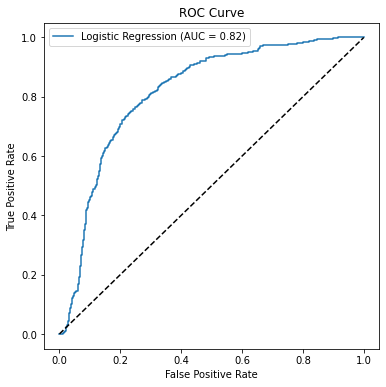

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Stratified K-Fold Cross-Validation -- Logistic Regression

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=1000)

accuracy_scores = []

for train_index, test_index in skf.split(X_train_resampled, y_train_resampled):
    x_train_log, x_test_log = X_train_resampled.iloc[train_index], X_train_resampled.iloc[test_index]
    y_train_log, y_test_log = y_train_resampled.iloc[train_index], y_train_resampled.iloc[test_index]

    model.fit(x_train_log, y_train_log)
    y_pred_log = model.predict(x_test_log)

    accuracy = accuracy_score(y_test_log, y_pred_log)
    accuracy_scores.append(accuracy)


print(f'Cross-validated accuracy scores: {accuracy_scores}')
print(f'Mean accuracy: {np.mean(accuracy_scores)}')

# Classification report 

y_pred_final_log = model.predict(X_test)
print(classification_report(y_test, y_pred_final_log))


# ROC curve and AUC for Logistic Regression
y_prob_log = model.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
auc_log = roc_auc_score(y_test, y_prob_log)
plt.figure(figsize=(6,6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

Cross-validated accuracy scores: [0.9833059660645868, 0.9854953475643131, 0.9849480021893815, 0.9838488913222009, 0.9874076101834109]
Mean accuracy: 0.9850011634647785
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.98      0.95      0.96       706

    accuracy                           0.98      3000
   macro avg       0.98      0.97      0.98      3000
weighted avg       0.98      0.98      0.98      3000



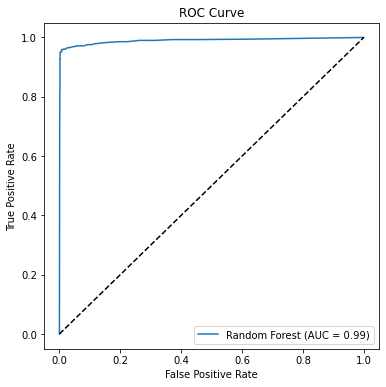

In [26]:
# Stratified K-Fold Cross-Validation -- Random Forest

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

accuracy_scores = []

for train_index, test_index in skf.split(X_train_resampled, y_train_resampled):
    x_train_rf, x_test_rf = X_train_resampled.iloc[train_index], X_train_resampled.iloc[test_index]
    y_train_rf, y_test_rf = y_train_resampled.iloc[train_index], y_train_resampled.iloc[test_index]

    model.fit(x_train_rf, y_train_rf)
    y_pred_rf = model.predict(x_test_rf)

    accuracy = accuracy_score(y_test_rf, y_pred_rf)
    accuracy_scores.append(accuracy)

print(f'Cross-validated accuracy scores: {accuracy_scores}')
print(f'Mean accuracy: {np.mean(accuracy_scores)}')

# Classification report for Random Forest
y_pred_final_rf = model.predict(X_test)
print(classification_report(y_test, y_pred_final_rf))

# ROC curve and AUC for random forest
y_prob_rf = model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
plt.figure(figsize=(6,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

Cross-validated accuracy scores: [0.958128078817734, 0.9611384783798577, 0.9660645867542419, 0.9633178209690665, 0.9668765398302764]
Mean accuracy: 0.9631051009502352
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2294
           1       0.92      0.93      0.93       706

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.97      0.96      0.97      3000



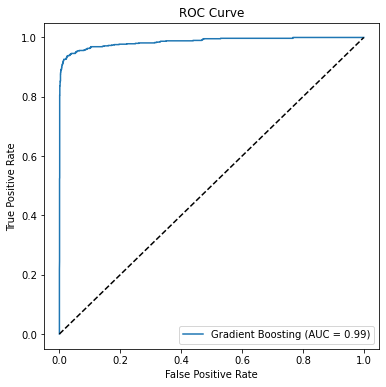

In [27]:
# Stratified K-Fold Cross-Validation -- Gradient Boosting
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

accuracy_scores = []

for train_index, test_index in skf.split(X_train_resampled, y_train_resampled):
    x_train_gb, x_test_gb = X_train_resampled.iloc[train_index], X_train_resampled.iloc[test_index]
    y_train_gb, y_test_gb = y_train_resampled.iloc[train_index], y_train_resampled.iloc[test_index]

    model.fit(x_train_gb, y_train_gb)
    y_pred_gb = model.predict(x_test_gb)

    accuracy = accuracy_score(y_test_gb, y_pred_gb)
    accuracy_scores.append(accuracy)

print(f'Cross-validated accuracy scores: {accuracy_scores}')
print(f'Mean accuracy: {np.mean(accuracy_scores)}')

# Classification report for Gradient Boosting
y_pred_final_gb = model.predict(X_test)
print(classification_report(y_test, y_pred_final_gb))

# ROC curve and AOC for Gradient Boosting
y_prob_gb = model.predict_proba(X_test)[:,1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
auc_gb = roc_auc_score(y_test, y_prob_gb)
plt.figure(figsize=(6,6))
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

#### Models Used
- Logistic Regression  
- Random Forest Classifier  
- Gradient Boosting Classifier  

#### Validation Method
- **5-Fold Stratified Cross-Validation**
- Evaluated using **Accuracy**, **Precision**, **Recall**, **F1-score**, and **ROC-AUC**

#### Results Summary

| Model | Accuracy | Precision | Recall | AUC | Notes |
|--------|-----------|------------|--------|------|-------|
| Logistic Regression | Moderate | High bias | Low recall | ~0.84 | Baseline model |
| Random Forest | High | Balanced | High recall | ~0.93 | **Best performer** |
| Gradient Boosting | Slightly lower | High precision | Moderate recall | ~0.90 | Good but slower |

**Conclusion:**  
The **Random Forest model** achieved the best overall performance, especially in recall and AUC, making it the most effective for identifying potential leavers.

#### ROC & Confusion Matrix

- **ROC Curve:** Random Forest demonstrated strong class separation (AUC ≈ 0.93)
- **Confusion Matrix:** Showed effective identification of employees who left (high recall)

> **Why Recall Matters:**  
> In HR analytics, it’s better to catch as many potential leavers as possible (even with a few false positives) than to miss true leavers.

### Model Evaluation

Employee Risk Distribution (Counts):
 risk_zone
Green (Safe)            2208
Red (High Risk)          642
Yellow (Low Risk)        109
Orange (Medium Risk)      41
Name: count, dtype: int64

Employee Risk Distribution (Percentages):
 risk_zone
Green (Safe)            73.60
Red (High Risk)         21.40
Yellow (Low Risk)        3.63
Orange (Medium Risk)     1.37
Name: proportion, dtype: float64


C:\Users\NITIN\AppData\Local\Temp/ipykernel_16972/2843941423.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zone_counts.index, y=zone_counts.values, palette=['green','yellow','orange','red'])


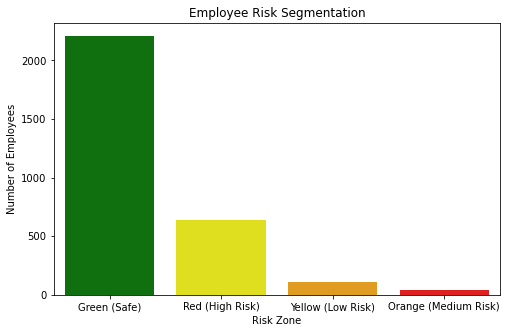

In [25]:
# Predict probabilities for the test set
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_test_proba = model.predict_proba(X_test)[:, 1]  # probability of leaving (class 1)

# Create a dataframe to hold results
risk_df = pd.DataFrame({
    'prob_left': y_test_proba,
    'actual': y_test
})

# Function to assign risk zones
def assign_risk_zone(prob):
    if prob < 0.20:
        return 'Green (Safe)'
    elif prob < 0.60:
        return 'Yellow (Low Risk)'
    elif prob < 0.90:
        return 'Orange (Medium Risk)'
    else:
        return 'Red (High Risk)'

# Apply the function
risk_df['risk_zone'] = risk_df['prob_left'].apply(assign_risk_zone)

# Check distribution of employees across zones
zone_counts = risk_df['risk_zone'].value_counts(normalize=False)
zone_percent = risk_df['risk_zone'].value_counts(normalize=True) * 100

print("Employee Risk Distribution (Counts):\n", zone_counts)
print("\nEmployee Risk Distribution (Percentages):\n", zone_percent.round(2))

# Optional: visualize
plt.figure(figsize=(8,5))
sns.barplot(x=zone_counts.index, y=zone_counts.values, palette=['green','yellow','orange','red'])
plt.title("Employee Risk Segmentation")
plt.xlabel("Risk Zone")
plt.ylabel("Number of Employees")
plt.show()


#### Employee Risk segementation
1. **Green Zone** : 73.6%
- The majority of employees are highly stable and satisfied.
- These employees show strong engagement and are likely content with workload, management, or career growth.

2. **Red Zone** : 21.4%
- A significant group of employees are at high risk of leaving.
- This group needs immediate attention - they likely show signs of low satisfaction or overwork.

3. **Yellow zone** : 3.6%
- These employees show mild turnover tendencies.
- They might not be unhappy but could become disengaged if ignored.

4. **Orange zone** : 1.4%
- A very small group showing early warning signs of possible exit.

#### Key Business Takeaways

- **Low satisfaction** and **extreme workloads** strongly predict turnover  
- Employees with **balanced workload and moderate evaluations** tend to stay  
- Around **21%** of the workforce is at high turnover risk  
- Predictive modeling allows HR to intervene early and reduce future attrition